In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:/Users/marza/Downloads/diabetes.csv")

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = data.drop(['Outcome'], axis=1)
y = data.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:>

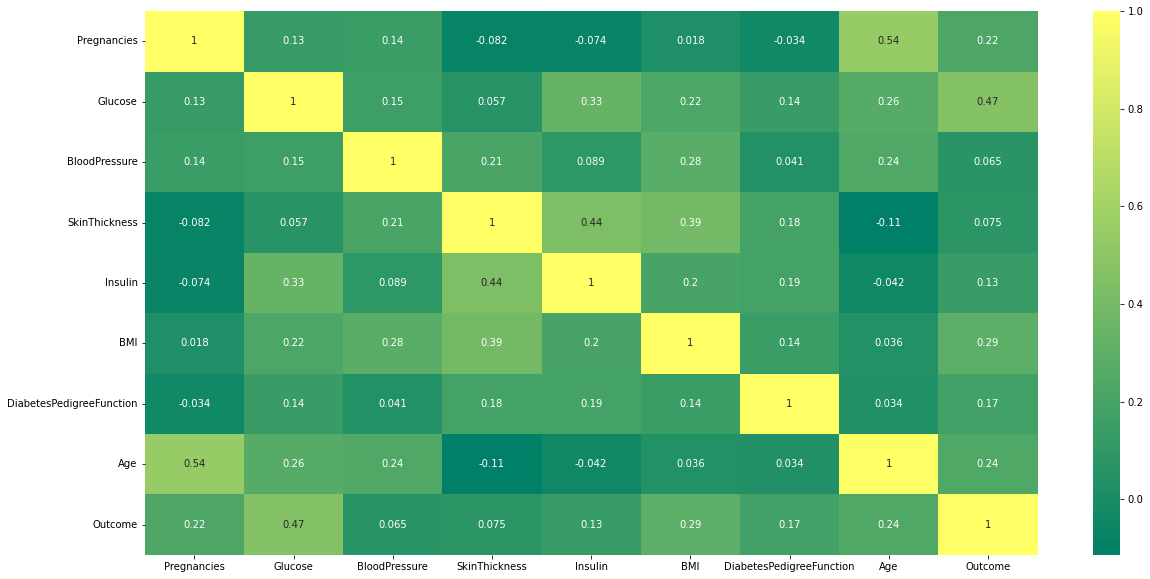

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, cmap = "summer")

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 )

In [17]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_classifier = NB_model.fit(x_train, y_train)
NB_prediction = NB_classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, NB_prediction)
print("confusion matrix:\n", CM)
CR=classification_report(y_test, NB_prediction)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

confusion matrix:
 [[98 23]
 [26 45]]
performance: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       121
           1       0.66      0.63      0.65        71

    accuracy                           0.74       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



0.8057269235246188

Text(0.5, 0, 'False Positive Rate')

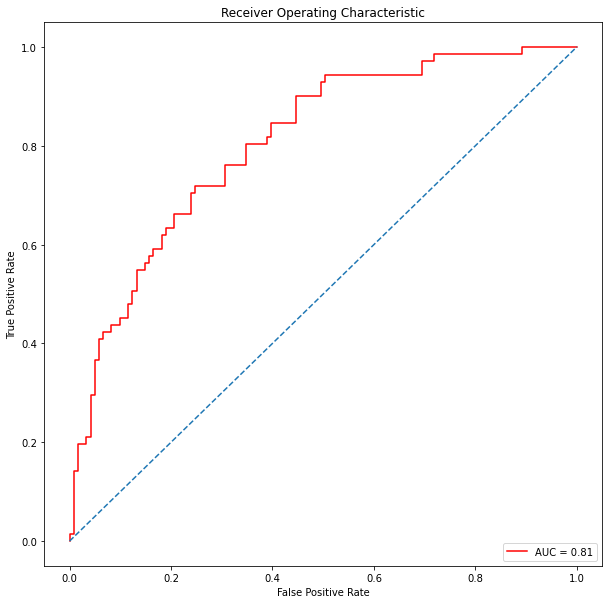

In [18]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [19]:
from sklearn.ensemble import RandomForestClassifier
NB_model = RandomForestClassifier()
NB_classifier = NB_model.fit(x_train, y_train)
NB_prediction = NB_classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, NB_prediction)
print("confusion matrix:\n", CM)
CR=classification_report(y_test, NB_prediction)
print("performance: \n", CR)
y_prob = NB_model.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

confusion matrix:
 [[101  20]
 [ 26  45]]
performance: 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       121
           1       0.69      0.63      0.66        71

    accuracy                           0.76       192
   macro avg       0.74      0.73      0.74       192
weighted avg       0.76      0.76      0.76       192



0.8238854615295076

Text(0.5, 0, 'False Positive Rate')

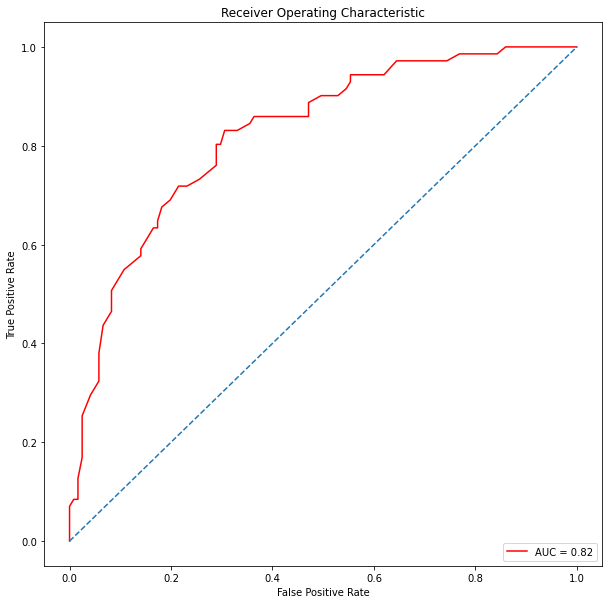

In [20]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
print(scaled_x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
pca = PCA(n_components=8)
pca.fit(scaled_x)
pca_x = pca.transform(scaled_x)
pca_x.shape

(768, 8)

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
#Support Vector Machine (SVM)
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(pca_x, y)
grid.best_params_

NameError: name 'SVC' is not defined